# Ensemble learning với gene di truyền để dự đoán ung thư


# 1. Khám Phá dữ liệu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import arff


In [5]:
!pip install liac-arff

  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11737 sha256=4f8338498f303c2aa1b122e8f3327c8c46b1de810eb70e814ed3c57622efd706
  Stored in directory: c:\users\h\appdata\local\pip\cache\wheels\53\ba\da\8562a6a6dbb428fd1ecc21053106df3948645cd991958f669b
Successfully built liac-arff


In [52]:
import arff, numpy as np
dataset = arff.load(open('lymphoma.arff', 'r'))

In [53]:
dataset.keys()

dict_keys(['description', 'relation', 'attributes', 'data'])

In [54]:
column_names = []
for pair in dataset["attributes"]:
    column_names.append(pair[0])

In [55]:
df = pd.DataFrame(data = np.array(dataset['data']))
list(gene_df.columns)

for idx in range(len(list(df.columns))):
    df.rename(columns = {idx: column_names[idx]}, inplace = True)

In [50]:
gene_df

,GENE1835X,GENE1836X,GENE1865X,GENE1380X,GENE1933X,GENE1932X,GENE1931X,GENE1930X,GENE3129X,GENE3126X,...,GENE3931X,GENE2588X,GENE3120X,GENE6X,GENE5X,GENE3X,GENE2X,GENE48X,GENE47X,class
0,0.46,0.7,0.67,-0.23,0,0.09,-0.02,-0.57,-0.17,-0.25,...,0.4,0.02,0.79,0.64,0.16,1.22,1.37,-0.04,0.16,DLBCL
1,0.02,0.59,0.45,0.55,-0.08,-0.15,-0.05,-0.38,-0.55,0.35,...,0.57,0.52,-0.23,0.3,0.09,-0.2,-0.05,-0.14,-1.15,DLBCL
2,-0.32,-0.63,-0.46,-0.28,-0.96,-1.17,-1.13,-0.89,-0.49,-0.23,...,1.62,-0.01,None,0.29,-0.57,1.2,1.4,0.29,0.25,DLBCL
3,-0.51,-0.45,-0.16,-0.51,-0.58,-0.71,-0.65,-0.82,-0.3,-0.22,...,0.34,0.02,0.08,0.49,0.29,1.26,1.24,0.05,0.7,DLBCL
4,0.2,0.13,0.2,0.09,-0.56,0,0.06,-0.15,-0.61,-0.65,...,0.16,0.66,1.11,0.28,0.12,-0.16,-0.72,-0.04,-0.22,DLBCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.77,None,0.8,-0.13,0.52,-0.58,-0.44,0.25,0.15,None,...,-0.37,None,None,None,-0.52,None,None,-0.86,None,CLL
62,-0.03,-0.38,0.01,0.29,-0.11,-0.13,-0.36,0.46,0.19,-0.05,...,-0.23,-0.19,-0.85,-1,-0.89,-1.79,-1.56,-0.26,1.04,CLL
63,0.09,None,0.85,0.55,0.3,0.3,0.16,0.34,0.9,0.85,...,0.09,-0.46,-0.14,None,-0.83,None,None,0.09,-0.53,CLL
64,0.34,None,0.36,0.11,0.15,0.19,-0.11,0.27,0.59,0.55,...,0.41,None,None,-0.42,-0.25,None,None,-0.33,None,CLL


In [56]:
df.shape

(66, 4027)

In [57]:
df.columns

Index(['GENE1835X', 'GENE1836X', 'GENE1865X', 'GENE1380X', 'GENE1933X',
       'GENE1932X', 'GENE1931X', 'GENE1930X', 'GENE3129X', 'GENE3126X',
       ...
       'GENE3931X', 'GENE2588X', 'GENE3120X', 'GENE6X', 'GENE5X', 'GENE3X',
       'GENE2X', 'GENE48X', 'GENE47X', 'class'],
      dtype='object', length=4027)

In [58]:
df.shape

(66, 4027)

In [59]:
df.head()

,GENE1835X,GENE1836X,GENE1865X,GENE1380X,GENE1933X,GENE1932X,GENE1931X,GENE1930X,GENE3129X,GENE3126X,...,GENE3931X,GENE2588X,GENE3120X,GENE6X,GENE5X,GENE3X,GENE2X,GENE48X,GENE47X,class
0,0.46,0.7,0.67,-0.23,0,0.09,-0.02,-0.57,-0.17,-0.25,...,0.4,0.02,0.79,0.64,0.16,1.22,1.37,-0.04,0.16,DLBCL
1,0.02,0.59,0.45,0.55,-0.08,-0.15,-0.05,-0.38,-0.55,0.35,...,0.57,0.52,-0.23,0.3,0.09,-0.2,-0.05,-0.14,-1.15,DLBCL
2,-0.32,-0.63,-0.46,-0.28,-0.96,-1.17,-1.13,-0.89,-0.49,-0.23,...,1.62,-0.01,None,0.29,-0.57,1.2,1.4,0.29,0.25,DLBCL
3,-0.51,-0.45,-0.16,-0.51,-0.58,-0.71,-0.65,-0.82,-0.3,-0.22,...,0.34,0.02,0.08,0.49,0.29,1.26,1.24,0.05,0.7,DLBCL
4,0.2,0.13,0.2,0.09,-0.56,0,0.06,-0.15,-0.61,-0.65,...,0.16,0.66,1.11,0.28,0.12,-0.16,-0.72,-0.04,-0.22,DLBCL


# 2. Tiền xử lý dữ liệu

Tách dữ liệu ra làm 2 phần: Input(X) và output(Y)

In [77]:
X = df[df.columns.difference(['class'])].copy()
Y= df["class"]

In [78]:
X.head()

,GENE0X,GENE1000X,GENE1001X,GENE1002X,GENE1003X,GENE1004X,GENE1005X,GENE1006X,GENE1007X,GENE1008X,...,GENE992X,GENE993X,GENE994X,GENE995X,GENE996X,GENE997X,GENE998X,GENE999X,GENE99X,GENE9X
0,-0.47,-1.88,-0.13,0.33,1.35,2.02,1.61,0.7,0.43,0.48,...,0.32,-0.5,-0.49,-0.58,0,0.32,-0.38,0.05,0.05,0.43
1,-0.19,-0.52,-0.54,-0.73,-0.52,-2.21,-1.96,-0.08,-0.26,0.18,...,1.04,0.08,0.35,0.2,0.21,0.2,0.61,0.27,0.11,-0.29
2,-0.16,-1.82,-1.59,-0.88,1.57,1.24,1.07,0.19,-0.49,0.49,...,0,-0.06,0.02,0.14,-0.82,-0.67,-0.27,-0.71,-0.23,-1.14
3,0.43,1.42,1.28,0.24,1.51,1.98,1.48,0.21,0.21,0.27,...,-0.73,0.29,0.5,0.34,0.24,-0.05,-0.28,0.34,0.06,0.38
4,0.36,-0.22,-0.01,-0.41,-1.18,-1.15,-1.08,0.15,0.26,-0.04,...,0.48,0.46,0.43,0.26,0.45,0.1,0.26,-0.25,-0.3,0.28


In [79]:
Y.head()

0    DLBCL
1    DLBCL
2    DLBCL
3    DLBCL
4    DLBCL
Name: class, dtype: object

In [81]:
Y.unique()

array(['DLBCL', 'FL', 'CLL'], dtype=object)

Kiểm tra những vị trí trống trên data và fill dữ liệu vào đó

In [80]:
X.fillna(X.mean(), inplace=True)

In [68]:
df.mean()

Series([], dtype: float64)

Kiểm tra phân bố nhãn

In [82]:
Y.value_counts()

DLBCL    46
CLL      11
FL        9
Name: class, dtype: int64

# 3. Xây dựng mô hình

# Decision Tree

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y)

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
clf = DecisionTreeClassifier(random_state=42)

In [88]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [89]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [91]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         CLL       1.00      1.00      1.00         8
       DLBCL       1.00      1.00      1.00        34
          FL       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix: 
 [[ 8  0  0]
 [ 0 34  0]
 [ 0  0  7]]



D:\Anaconda\envs\bml\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Average Accuracy: 	 0.8800
Accuracy SD: 		 0.1318


In [92]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9412

Classification Report: 
               precision    recall  f1-score   support

         CLL       0.75      1.00      0.86         3
       DLBCL       1.00      1.00      1.00        12
          FL       1.00      0.50      0.67         2

   micro avg       0.94      0.94      0.94        17
   macro avg       0.92      0.83      0.84        17
weighted avg       0.96      0.94      0.94        17


Confusion Matrix: 
 [[ 3  0  0]
 [ 0 12  0]
 [ 1  0  1]]



Dù kết quả cao nhưng độ lệch chuẩn của kiểm định chéo cũng khá cao, cho thấy mô hình học chưa được ổn định

****

# Bagging

In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, n_jobs=-1, random_state=42)

In [95]:
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [96]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         CLL       1.00      1.00      1.00         8
       DLBCL       1.00      1.00      1.00        34
          FL       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix: 
 [[ 8  0  0]
 [ 0 34  0]
 [ 0  0  7]]



D:\Anaconda\envs\bml\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Average Accuracy: 	 0.9633
Accuracy SD: 		 0.0737
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         CLL       1.00      1.00      1.00         3
       DLBCL       1.00      1.00      1.00        12
          FL       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Confusion Matrix: 
 [[ 3  0  0]
 [ 0 12  0]
 [ 0  0  2]]



***

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_clf = RandomForestClassifier()

In [99]:
rf_clf.fit(X_train, y_train.ravel())

D:\Anaconda\envs\bml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         CLL       1.00      1.00      1.00         8
       DLBCL       1.00      1.00      1.00        34
          FL       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix: 
 [[ 8  0  0]
 [ 0 34  0]
 [ 0  0  7]]



D:\Anaconda\envs\bml\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Average Accuracy: 	 0.9467
Accuracy SD: 		 0.0819
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         CLL       1.00      1.00      1.00         3
       DLBCL       1.00      1.00      1.00        12
          FL       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Confusion Matrix: 
 [[ 3  0  0]
 [ 0 12  0]
 [ 0  0  2]]



In [101]:
import seaborn as sns

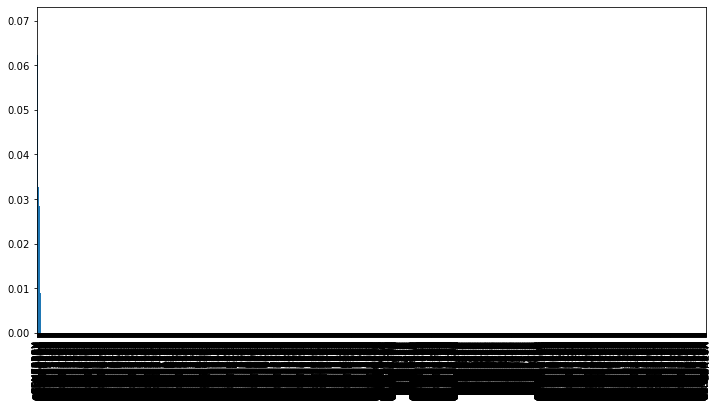

In [102]:
pd.Series(rf_clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# AdaBoost

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
ada_clf = AdaBoostClassifier()

In [105]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [106]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         CLL       1.00      1.00      1.00         8
       DLBCL       1.00      1.00      1.00        34
          FL       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix: 
 [[ 8  0  0]
 [ 0 34  0]
 [ 0  0  7]]



D:\Anaconda\envs\bml\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Average Accuracy: 	 0.9633
Accuracy SD: 		 0.0737
Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

         CLL       1.00      1.00      1.00         3
       DLBCL       1.00      1.00      1.00        12
          FL       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17


Confusion Matrix: 
 [[ 3  0  0]
 [ 0 12  0]
 [ 0  0  2]]

